In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:

x_train = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset4\train_data.csv")
y_train = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset4\train_label.csv")
x_test  = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset4\test_data.csv")
y_test  = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset4\test_label.csv")



In [10]:
num_classes = len(np.unique(y_train))
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh  = to_categorical(y_test, num_classes)

model = Sequential([
    Dense(25, activation="tanh", input_shape=(x_train.shape[1],)),
    Dense(15, activation="tanh"),
    Dense(num_classes, activation="softmax")
])

sgd = SGD(learning_rate=0.07, momentum=0.9)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

es = EarlyStopping(monitor="loss", min_delta=1e-3, patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train_oh,
    batch_size=8,
    epochs=200,
    shuffle=True,
    # callbacks=[es],
    verbose=1
)


Epoch 1/200


c:\Users\hrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3412 - loss: 1.5005
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4297 - loss: 1.3298
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4792 - loss: 1.2599
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4917 - loss: 1.2290
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5163 - loss: 1.1991
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5353 - loss: 1.1767
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5058 - loss: 1.2132
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5193 - loss: 1.2015
Epoch 9/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5263 - loss: 1.1870
Epoch 10/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5308 - loss: 1.1617
Epoch 11/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5348 - loss: 1.1770
Epoch 12/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

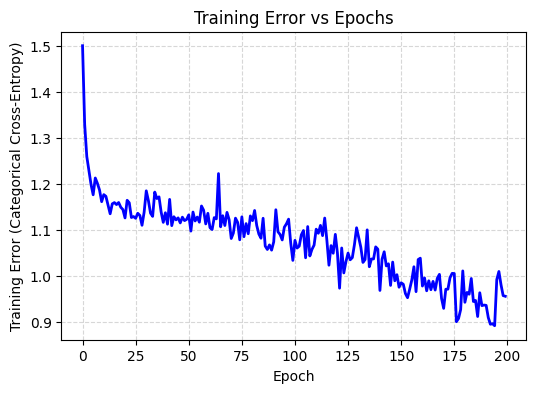

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], color='blue', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Training Error (Categorical Cross-Entropy)")
plt.title("Training Error vs Epochs")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


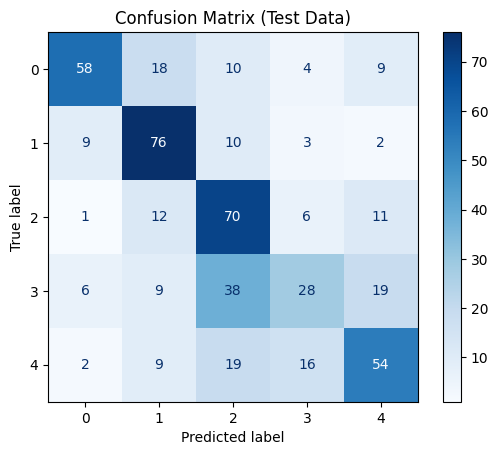

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=True)
plt.title("Confusion Matrix (Test Data)")
plt.show()


In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Ensure 1-D numpy arrays
y_test_np = np.asarray(y_test).ravel()
y_pred_np = np.asarray(y_pred).ravel()

cm = confusion_matrix(y_test_np, y_pred_np)
per_class_acc = cm.diagonal() / cm.sum(axis=1)

# Class labels (in the order used by cm rows)
classes = np.unique(y_test_np)

for c, acc in zip(classes, per_class_acc):
    print(f"Class {c} accuracy: {acc:.4f}")

print(f"\nAverage per-class accuracy: {per_class_acc.mean():.4f}")


Class 0.0 accuracy: 0.5859
Class 1.0 accuracy: 0.7600
Class 2.0 accuracy: 0.7000
Class 3.0 accuracy: 0.2800
Class 4.0 accuracy: 0.5400

Average per-class accuracy: 0.5732
